# Kids play with HousingPrice

First step is to import the required library's:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

To play with data we need to load first ;)

In [2]:
T_train = pd.read_csv("C:\\Users\\bhara\\Downloads\\housing price data sets\\train.csv")
T_test = pd.read_csv("C:\\Users\\bhara\\Downloads\\test.csv")

In [3]:
T_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
T_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
train_x = T_train.drop(["SalePrice"], axis = 1)

In [6]:
df = pd.concat([train_x,T_test],axis = 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
Exterior1st         1
Exterior2nd         1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
                 ... 
YearBuilt           0
OverallCond         0
SaleCondition       0
Heating             0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

In [10]:
##Droping attributes which have more than 60% null values:

df=df.drop(['Id','MiscFeature','Fence','PoolQC','Alley'],axis=1)   #Including "Id"

In [11]:
num_col = df._get_numeric_data()
num_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 36 columns):
MSSubClass       2919 non-null int64
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
MasVnrArea       2896 non-null float64
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtUnfSF        2918 non-null float64
TotalBsmtSF      2918 non-null float64
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
LowQualFinSF     2919 non-null int64
GrLivArea        2919 non-null int64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
FullBath         2919 non-null int64
HalfBath         2919 non-null int64
BedroomAbvGr     2919 non-null int64
KitchenAbvGr     2919 non-null int64
TotRmsAbvGrd     2919 non-null int64
Fireplaces       2919 non-

# Missing value imputation:

In [12]:
##First let's do for Numarical attributes:

num_nulls = num_col.isnull().sum().sort_values(ascending=False)

# Outliers treatment:

In [13]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_col.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
MSSubClass,2919.0,0.0,166785.0,57.137718,50.0,42.517628,1.807749e+03,20.0,20.00,20.00,20.0,20.0,50.0,70.0,120.0,160.00,190.00,190.0
LotFrontage,2433.0,486.0,168621.0,69.305795,68.0,23.344905,5.449846e+02,21.0,21.00,32.00,43.0,59.0,68.0,80.0,95.0,107.00,135.68,313.0
LotArea,2919.0,0.0,29680725.0,10168.114080,9453.0,7886.996359,6.220471e+07,1300.0,1680.00,3182.00,4922.4,7478.0,9453.0,11570.0,14300.6,17142.90,33038.64,215245.0
OverallQual,2919.0,0.0,17774.0,6.089072,6.0,1.409947,1.987951e+00,1.0,3.00,4.00,5.0,5.0,6.0,7.0,8.0,8.00,10.00,10.0
OverallCond,2919.0,0.0,16243.0,5.564577,5.0,1.113131,1.239060e+00,1.0,3.00,4.00,5.0,5.0,5.0,6.0,7.0,8.00,9.00,9.0
YearBuilt,2919.0,0.0,5754262.0,1971.312778,1973.0,30.291442,9.175714e+02,1872.0,1900.00,1915.00,1924.0,1953.5,1973.0,2001.0,2006.0,2007.00,2008.00,2010.0
YearRemodAdd,2919.0,0.0,5792068.0,1984.264474,1993.0,20.894344,4.365736e+02,1950.0,1950.00,1950.00,1950.0,1965.0,1993.0,2004.0,2006.2,2007.00,2009.00,2010.0
MasVnrArea,2896.0,23.0,295975.0,102.201312,0.0,179.334253,3.216077e+04,0.0,0.00,0.00,0.0,0.0,0.0,164.0,325.5,466.50,771.05,1600.0
BsmtFinSF1,2918.0,1.0,1288073.0,441.423235,368.5,455.610826,2.075812e+05,0.0,0.00,0.00,0.0,0.0,368.5,733.0,1056.9,1274.00,1635.32,5644.0
BsmtFinSF2,2918.0,1.0,144681.0,49.582248,0.0,169.205611,2.863054e+04,0.0,0.00,0.00,0.0,0.0,0.0,0.0,125.6,435.00,874.66,1526.0


In [14]:
def var_summary(x):
    return pd.Series([x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_col.apply(lambda x: var_summary(x)).T

,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
MSSubClass,20.00,20.00,20.0,20.0,50.0,70.0,120.0,160.00,190.00,190.0
LotFrontage,21.00,32.00,43.0,59.0,68.0,80.0,95.0,107.00,135.68,313.0
LotArea,1680.00,3182.00,4922.4,7478.0,9453.0,11570.0,14300.6,17142.90,33038.64,215245.0
OverallQual,3.00,4.00,5.0,5.0,6.0,7.0,8.0,8.00,10.00,10.0
OverallCond,3.00,4.00,5.0,5.0,5.0,6.0,7.0,8.00,9.00,9.0
YearBuilt,1900.00,1915.00,1924.0,1953.5,1973.0,2001.0,2006.0,2007.00,2008.00,2010.0
YearRemodAdd,1950.00,1950.00,1950.0,1965.0,1993.0,2004.0,2006.2,2007.00,2009.00,2010.0
MasVnrArea,0.00,0.00,0.0,0.0,0.0,164.0,325.5,466.50,771.05,1600.0
BsmtFinSF1,0.00,0.00,0.0,0.0,368.5,733.0,1056.9,1274.00,1635.32,5644.0
BsmtFinSF2,0.00,0.00,0.0,0.0,0.0,0.0,125.6,435.00,874.66,1526.0


In [15]:
num_col['LotArea']= num_col['LotArea'].clip_upper(num_col['LotArea'].quantile(0.99))
num_col['LotArea']= num_col['LotArea'].clip_upper(num_col['LotArea'].quantile(0.01))
num_col['MasVnrArea']= num_col['MasVnrArea'].clip_upper(num_col['MasVnrArea'].quantile(0.99))
num_col['BsmtFinSF1']= num_col['BsmtFinSF1'].clip_upper(num_col['BsmtFinSF1'].quantile(0.99))
num_col['BsmtFinSF2']= num_col['BsmtFinSF2'].clip_upper(num_col['BsmtFinSF2'].quantile(0.99))
num_col['BsmtUnfSF']= num_col['BsmtUnfSF'].clip_upper(num_col['BsmtUnfSF'].quantile(0.99))
num_col['TotalBsmtSF']= num_col['TotalBsmtSF'].clip_upper(num_col['TotalBsmtSF'].quantile(0.99))
num_col['1stFlrSF']= num_col['1stFlrSF'].clip_upper(num_col['1stFlrSF'].quantile(0.99))
num_col['2ndFlrSF']= num_col['2ndFlrSF'].clip_upper(num_col['2ndFlrSF'].quantile(0.99))
num_col['LowQualFinSF']= num_col['LowQualFinSF'].clip_upper(num_col['LowQualFinSF'].quantile(0.99))
num_col['GrLivArea']= num_col['GrLivArea'].clip_upper(num_col['GrLivArea'].quantile(0.99))
num_col['FullBath']= num_col['FullBath'].clip_upper(num_col['FullBath'].quantile(0.99))
num_col['BedroomAbvGr']= num_col['BedroomAbvGr'].clip_upper(num_col['BedroomAbvGr'].quantile(0.99))
num_col['TotRmsAbvGrd']= num_col['TotRmsAbvGrd'].clip_upper(num_col['TotRmsAbvGrd'].quantile(0.99))
num_col['Fireplaces']= num_col['Fireplaces'].clip_upper(num_col['Fireplaces'].quantile(0.99))
num_col['GarageYrBlt']= num_col['GarageYrBlt'].clip_upper(num_col['GarageYrBlt'].quantile(0.99))
num_col['GarageCars']= num_col['GarageCars'].clip_upper(num_col['GarageCars'].quantile(0.99))
num_col['GarageArea']= num_col['GarageArea'].clip_upper(num_col['GarageArea'].quantile(0.99))
num_col['WoodDeckSF']= num_col['WoodDeckSF'].clip_upper(num_col['WoodDeckSF'].quantile(0.99))
num_col['OpenPorchSF']= num_col['OpenPorchSF'].clip_upper(num_col['OpenPorchSF'].quantile(0.99))
num_col['EnclosedPorch']= num_col['EnclosedPorch'].clip_upper(num_col['EnclosedPorch'].quantile(0.99))
num_col['3SsnPorch']= num_col['3SsnPorch'].clip_upper(num_col['3SsnPorch'].quantile(0.99))
num_col['ScreenPorch']= num_col['ScreenPorch'].clip_upper(num_col['ScreenPorch'].quantile(0.99))
num_col['PoolArea']= num_col['PoolArea'].clip_upper(num_col['PoolArea'].quantile(0.99))
num_col['MiscVal']= num_col['MiscVal'].clip_upper(num_col['MiscVal'].quantile(0.99))

In [16]:
num_nulls

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallCond        0
YearBuilt          0
YearRemodAdd       0
OverallQual        0
GrLivArea          0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
YrSold             0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MSSubClass         0
dtype: int64

In [17]:
## Filling null values attributes with mean...

num_col['LotFrontage']=num_col['LotFrontage'].fillna(num_col['LotFrontage'].mean())  
num_col['GarageYrBlt']=num_col['GarageYrBlt'].fillna(num_col['GarageYrBlt'].mean())
num_col['MasVnrArea']=num_col['MasVnrArea'].fillna(num_col['MasVnrArea'].mean())
num_col['BsmtHalfBath']=num_col['BsmtHalfBath'].fillna(num_col['BsmtHalfBath'].mean())
num_col['BsmtFullBath']=num_col['BsmtFullBath'].fillna(num_col['BsmtFullBath'].mean())
num_col['GarageArea']=num_col['GarageArea'].fillna(num_col['GarageArea'].mean())
num_col['BsmtFinSF1']=num_col['BsmtFinSF1'].fillna(num_col['BsmtFinSF1'].mean())
num_col['BsmtFinSF2']=num_col['BsmtFinSF2'].fillna(num_col['BsmtFinSF2'].mean())
num_col['BsmtUnfSF']=num_col['BsmtUnfSF'].fillna(num_col['BsmtUnfSF'].mean())
num_col['TotalBsmtSF']=num_col['TotalBsmtSF'].fillna(num_col['TotalBsmtSF'].mean())
num_col['GarageCars']=num_col['GarageCars'].fillna(num_col['GarageCars'].mean())

In [18]:
num_col.isnull().sum().sum()

0

In [19]:
num_col.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

filling null values for categorical

In [20]:
dfcat_cols = df.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],axis = 1)

In [21]:
dfcat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 39 columns):
MSZoning         2915 non-null object
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non-null object
ExterQual        2919 non-null object
ExterCond        2919 non-null object
Foundation       2919 non-null object
BsmtQual         2838 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinType1     28

In [22]:
dfcat_cols.isnull().sum().sort_values(ascending = False)

FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
LandContour         0
BldgType            0
LotShape            0
LotConfig           0
LandSlope           0
Street              0
Neighborhood        0
Condition1          0
Condition2          0
SaleCondition       0
HouseStyle          0
RoofStyle           0
RoofMatl            0
ExterQual           0
ExterCond           0
Heating             0
HeatingQC           0
CentralAir          0
PavedDrive          0
Foundation          0
dtype: int64

In [23]:
dfcat_cols.describe().T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511
Condition2,2919,8,Norm,2889


In [24]:
dfcat_cols["FireplaceQu"] = dfcat_cols["FireplaceQu"].fillna('Gd')
dfcat_cols["GarageCond"] = dfcat_cols["GarageCond"].fillna('TA')
dfcat_cols["GarageQual"] = dfcat_cols["GarageQual"].fillna('TA')
dfcat_cols["GarageFinish"] = dfcat_cols["GarageFinish"].fillna('Unf')
dfcat_cols["GarageType"] = dfcat_cols["GarageType"].fillna('Attchd')
dfcat_cols["BsmtCond"] = dfcat_cols["BsmtCond"].fillna('TA')
dfcat_cols["BsmtExposure"] = dfcat_cols["BsmtExposure"].fillna('No')
dfcat_cols["BsmtQual"] = dfcat_cols["BsmtQual"].fillna('TA')
dfcat_cols["BsmtFinType2"] = dfcat_cols["BsmtFinType2"].fillna('Unf')
dfcat_cols["BsmtFinType1"] = dfcat_cols["BsmtFinType1"].fillna('Unf')
dfcat_cols["MasVnrType"] = dfcat_cols["MasVnrType"].fillna('None')
dfcat_cols["MSZoning"] = dfcat_cols["MSZoning"].fillna('RL')
dfcat_cols["Utilities"] = dfcat_cols["Utilities"].fillna('AllPub')
dfcat_cols["Functional"] = dfcat_cols["Functional"].fillna('Typ')
dfcat_cols["Electrical"] = dfcat_cols["Electrical"].fillna('SBrkr')
dfcat_cols["KitchenQual"] = dfcat_cols["KitchenQual"].fillna('TA')
dfcat_cols["SaleType"] = dfcat_cols["SaleType"].fillna('WD')
dfcat_cols["Exterior2nd"] = dfcat_cols["Exterior2nd"].fillna('VinylSd')
dfcat_cols["Exterior1st"] = dfcat_cols["Exterior1st"].fillna('VinylSd')

In [25]:
dfcat_cols.isnull().sum().any()

False

Now concat both dfcat_cols and num_col:

In [26]:
df1 = pd.concat([num_col,dfcat_cols],axis = 1)

In [27]:
df1.isnull().sum().sum()

0

In [28]:
df1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.0,1680.0,7,5,2003,2003,196.0,706.0,0.0,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,80.0,1680.0,6,8,1976,1976,0.0,978.0,0.0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,68.0,1680.0,7,5,2001,2002,162.0,486.0,0.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,60.0,1680.0,7,5,1915,1970,0.0,216.0,0.0,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,84.0,1680.0,8,5,2000,2000,350.0,655.0,0.0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [29]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
MSSubClass       2919 non-null int64
LotFrontage      2919 non-null float64
LotArea          2919 non-null float64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
MasVnrArea       2919 non-null float64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtUnfSF        2919 non-null float64
TotalBsmtSF      2919 non-null float64
1stFlrSF         2919 non-null float64
2ndFlrSF         2919 non-null float64
LowQualFinSF     2919 non-null float64
GrLivArea        2919 non-null float64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
FullBath         2919 non-null float64
HalfBath         2919 non-null int64
BedroomAbvGr     2919 non-null float64
KitchenAbvGr     2919 non-null int64
TotRmsAbvGrd     2919 non-null float64
Fireplaces

In [30]:
tt = df1[0:1460:]
test = df1[1461::]

In [31]:
tt.isnull().sum().sum()

0

In [32]:
test.isnull().sum().sum()

0

In [33]:
target = T_train.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],axis =1)

In [34]:
train = pd.concat([tt,target],axis =1)

In [35]:
train.isnull().sum().sum()

0

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
LowQualFinSF     1460 non-null float64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
FullBath         1460 non-null float64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null float64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null float64
Fireplaces

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1458
Data columns (total 75 columns):
MSSubClass       1458 non-null int64
LotFrontage      1458 non-null float64
LotArea          1458 non-null float64
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
MasVnrArea       1458 non-null float64
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtUnfSF        1458 non-null float64
TotalBsmtSF      1458 non-null float64
1stFlrSF         1458 non-null float64
2ndFlrSF         1458 non-null float64
LowQualFinSF     1458 non-null float64
GrLivArea        1458 non-null float64
BsmtFullBath     1458 non-null float64
BsmtHalfBath     1458 non-null float64
FullBath         1458 non-null float64
HalfBath         1458 non-null int64
BedroomAbvGr     1458 non-null float64
KitchenAbvGr     1458 non-null int64
TotRmsAbvGrd     1458 non-null float64
Fireplaces

In [38]:
numaric_cols =train._get_numeric_data()
numaric_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Finding correlation with respect to SalePrice:(only for num.attr's)

In [39]:
corr = numaric_cols.corr()['SalePrice']
corr[np.argsort(corr,axis=0)].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.711853
GarageCars       0.646652
TotalBsmtSF      0.639838
GarageArea       0.630935
1stFlrSF         0.624035
FullBath         0.560664
TotRmsAbvGrd     0.537836
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475201
GarageYrBlt      0.471110
Fireplaces       0.469543
BsmtFinSF1       0.396550
OpenPorchSF      0.334947
LotFrontage      0.334820
WoodDeckSF       0.328688
2ndFlrSF         0.302673
HalfBath         0.284108
BsmtFullBath     0.227122
BsmtUnfSF        0.206847
BedroomAbvGr     0.175757
ScreenPorch      0.105661
LotArea          0.066608
3SsnPorch        0.048565
MoSold           0.046432
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.020498
YrSold          -0.028923
LowQualFinSF    -0.046606
MiscVal         -0.051145
OverallCond     -0.077856
MSSubClass      -0.084284
KitchenAbvGr    -0.135907
EnclosedPorch   -0.138578
PoolArea              NaN
Name: SalePrice, dtype: float64

# Heatmap for correlation with respect to SalePrice

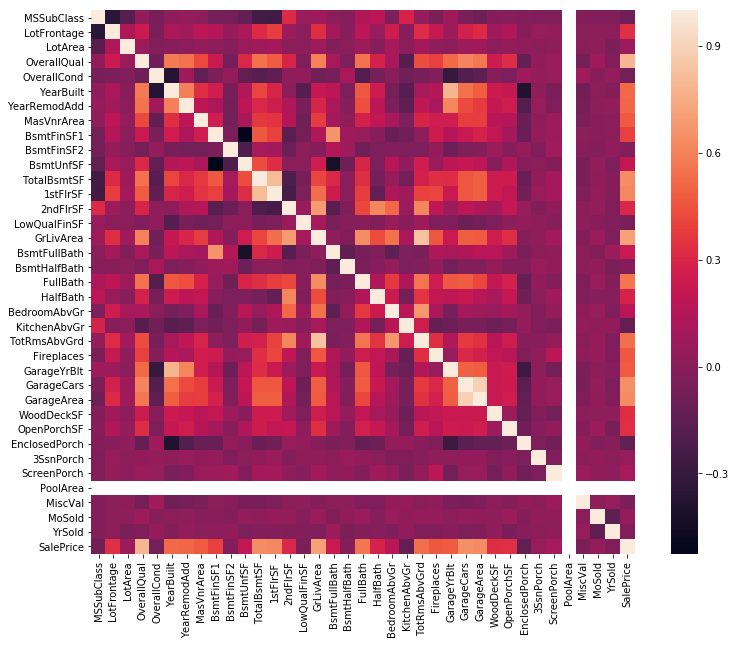

In [40]:
num_corr=numaric_cols.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(num_corr,square = True)

In [41]:
numaric_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

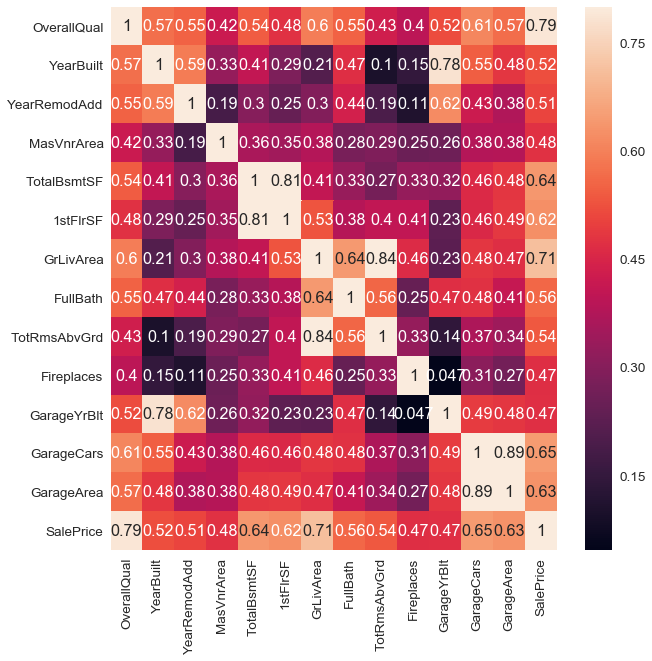

In [42]:
pp = numaric_cols.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
          'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
        'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr',
        'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],axis =1)
cm =pp.corr()
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(10,10))
hm=sns.heatmap(cm, annot = True, vmax =.8)

In [43]:
pp.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [44]:
nc = pp.rename(columns ={'1stFlrSF':'FirstFlrSF'})

In [45]:
nc.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FirstFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [46]:
## Using statsmodel.formula.api we'll find the correlation

import statsmodels.formula.api as smf

In [47]:
lm=smf.ols('SalePrice~OverallQual+YearBuilt+YearRemodAdd+MasVnrArea+TotalBsmtSF+FirstFlrSF+GrLivArea+FullBath+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea',nc).fit()

In [48]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     432.9
Date:                Sat, 11 Nov 2017   Prob (F-statistic):               0.00
Time:                        07:31:26   Log-Likelihood:                -17385.
No. Observations:                1460   AIC:                         3.480e+04
Df Residuals:                    1446   BIC:                         3.487e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.253e+06    1.3e+05     -9.655      0.000   -1.51e+06   -9.99e+05
OverallQual   1.671e+04   1160.793     14.392      0.000    1.44e+04     1.9e+04
YearBuilt      196.0346     58.142      3.372      0.001      81.983     310.086
YearRemodAdd   362.2536     63.446      5.710      0.000     237.797     486.711
MasVnrArea      28.3377      6.593      4.298      0.000      15.405      41.271
TotalBsmtSF     32.0923      4.314      7.439      0.000      23.630      40.554
FirstFlrSF      10.5024      4.842      2.169      0.030       1.005      20.000
GrLivArea       51.9422      4.544     11.432      0.000      43.029      60.855
FullBath     -5792.8401   2595.957     -2.231      0.026   -1.09e+04    -700.596
TotRmsAbvGrd  -413.3783   1120.154     -0.369      0.712   -2610.679    1783.922
Fireplaces    9519.1965   1793.248      5.308      0.000    6001.551     1.3e+04
GarageYrBlt     43.0596     69.421      0.620      0.535     -93.118     179.237
GarageCars    3634.9517   3084.255      1.179      0.239   -2415.141    9685.044
GarageArea      30.4841     10.566      2.885      0.004       9.758      51.210
==============================================================================
Omnibus:                      723.231   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23455.880
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                      22.346   Cond. No.                     5.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
lm.pvalues

Intercept       2.044948e-21
OverallQual     5.447006e-44
YearBuilt       7.669015e-04
YearRemodAdd    1.372214e-08
MasVnrArea      1.837582e-05
TotalBsmtSF     1.726584e-13
FirstFlrSF      3.023986e-02
GrLivArea       4.906024e-29
FullBath        2.580176e-02
TotRmsAbvGrd    7.121541e-01
Fireplaces      1.278844e-07
GarageYrBlt     5.351818e-01
GarageCars      2.387709e-01
GarageArea      3.970385e-03
dtype: float64

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [51]:
nc['intercept'] = lm.params[0]

In [52]:
np.linalg.inv(nc[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FirstFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces',
       'GarageArea']].corr().as_matrix())

array([[ 2.8518115 , -0.58058859, -0.5981847 , -0.20383824, -0.73732656,
         0.42779074, -0.85382994, -0.12814345, -0.34015318, -0.33918223],
       [-0.58058859,  2.32252543, -0.71888085, -0.27968506, -0.40016828,
         0.23973173,  0.9223571 , -0.7227657 , -0.05342944, -0.46243648],
       [-0.5981847 , -0.71888085,  1.7915318 ,  0.17337139,  0.07762903,
        -0.02962696, -0.05389164, -0.18002612,  0.16165937, -0.0193323 ],
       [-0.20383824, -0.27968506,  0.17337139,  1.35292595, -0.12626482,
        -0.02554161, -0.29958254,  0.1082852 , -0.03574852, -0.15537143],
       [-0.73732656, -0.40016828,  0.07762903, -0.12626482,  3.41540587,
        -2.53420397,  0.35903868,  0.21827489,  0.07689615, -0.06635933],
       [ 0.42779074,  0.23973173, -0.02962696, -0.02554161, -2.53420397,
         3.52511281, -0.70693526, -0.17164696, -0.33121441, -0.33641538],
       [-0.85382994,  0.9223571 , -0.05389164, -0.29958254,  0.35903868,
        -0.70693526,  2.89384078, -1.2981384 

In [53]:
#should be less than 5 only then we consider those attributes:
np.diag(np.linalg.inv(nc[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FirstFlrSF', 'GrLivArea', 'FullBath','Fireplaces', 'TotRmsAbvGrd', 'GarageArea']].corr().as_matrix()), 0)

array([ 2.85788429,  2.33401911,  1.79327783,  1.35326498,  3.42468417,
        3.52644631,  5.5420426 ,  2.23686499,  1.40735939,  3.55551846,
        1.79885636])

In [54]:
#final numarical columns:
finalnum_cols = nc.drop([ "GarageCars", "GarageYrBlt", "TotRmsAbvGrd"],axis =1)
finalnum_cols.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FirstFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea',
       'SalePrice', 'intercept'],
      dtype='object')

# Now its time deal categorical attributes:

In [55]:
cc = train.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],axis = 1)

In [56]:
cc.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [57]:
cc.isnull().sum().any()

False

In [58]:
# we should add SalePrice as categorical attributes does not have target(SalePrice)
categorical_col =pd.concat([cc,nc.SalePrice],axis=1)
categorical_col.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [59]:
##Now we need to do stats model.api:

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [60]:
lm1 = smf.ols('SalePrice ~MSZoning+Street+LotShape+LandContour+Utilities+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinType2+Heating+HeatingQC+CentralAir+Electrical+KitchenQual+Functional+FireplaceQu+GarageType+GarageFinish+GarageQual+GarageCond+PavedDrive+SaleType+SaleCondition', categorical_col).fit()

In [61]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     34.81
Date:                Sat, 11 Nov 2017   Prob (F-statistic):               0.00
Time:                        07:31:44   Log-Likelihood:                -17178.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1260   BIC:                         3.581e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2.015e+04   8.43e+04     -0.239      0.811   -1.85e+05    1.45e+05
MSZoning[T.FV]            4.387e+04   1.73e+04      2.542      0.011       1e+04    7.77e+04
MSZoning[T.RH]            5.029e+04   1.72e+04      2.924      0.004    1.65e+04     8.4e+04
MSZoning[T.RL]            4.758e+04   1.47e+04      3.238      0.001    1.88e+04    7.64e+04
MSZoning[T.RM]            4.416e+04   1.38e+04      3.207      0.001    1.71e+04    7.12e+04
Street[T.Pave]            1.354e+04    1.7e+04      0.798      0.425   -1.98e+04    4.68e+04
LotShape[T.IR2]           8617.1803   6095.679      1.414      0.158   -3341.618    2.06e+04
LotShape[T.IR3]           2.799e+04   1.25e+04      2.231      0.026    3382.150    5.26e+04
LotShape[T.Reg]           -648.4474   2335.886     -0.278      0.781   -5231.101    3934.206
LandContour[T.HLS]        4955.8344   7424.831      0.667      0.505   -9610.559    1.95e+04
LandContour[T.Low]       -6816.9031   9019.921     -0.756      0.450   -2.45e+04    1.09e+04
LandContour[T.Lvl]        5085.7790   5341.769      0.952      0.341   -5393.963    1.56e+04
Utilities[T.NoSeWa]      -4.721e+04    3.7e+04     -1.274      0.203    -1.2e+05    2.55e+04
LotConfig[T.CulDSac]      9232.4430   4636.373      1.991      0.047     136.582    1.83e+04
LotConfig[T.FR2]         -2.116e+04   5764.785     -3.671      0.000   -3.25e+04   -9855.078
LotConfig[T.FR3]         -1.777e+04   1.84e+04     -0.968      0.333   -5.38e+04    1.83e+04
LotConfig[T.Inside]      -6005.7454   2547.942     -2.357      0.019    -1.1e+04   -1007.068
LandSlope[T.Mod]          6642.7625   5757.352      1.154      0.249   -4652.289    1.79e+04
LandSlope[T.Sev]          6996.9056   1.36e+04      0.513      0.608   -1.98e+04    3.38e+04
Neighborhood[T.Blueste]  -1.565e+04   2.77e+04     -0.565      0.572      -7e+04    3.87e+04
Neighborhood[T.BrDale]   -1.506e+04   1.55e+04     -0.971      0.332   -4.55e+04    1.54e+04
Neighborhood[T.BrkSide]  -2.934e+04    1.3e+04     -2.261      0.024   -5.48e+04   -3878.797
Neighborhood[T.ClearCr]  -1.898e+04    1.3e+04     -1.462      0.144   -4.45e+04    6483.868
Neighborhood[T.CollgCr]  -2.389e+04   1.01e+04     -2.368      0.018   -4.37e+04   -4098.367
Neighborhood[T.Crawfor]   7928.4532   1.18e+04      0.673      0.501   -1.52e+04    3.11e+04
Neighborhood[T.Edwards]   -4.35e+04   1.11e+04     -3.929      0.000   -6.52e+04   -2.18e+04
Neighborhood[T.Gilbert]  -3.352e+04   1.08e+04     -3.108      0.002   -5.47e+04   -1.24e+04
Neighborhood[T.IDOTRR]   -4.183e+04   1.49e+04     -2.814      0.005    -7.1e+04   -1.27e+04
Neighborhood[T.MeadowV]  -3.907e+04   1.55e+04     -2.519      0.012   -6.95e+04   -8638.669
Neighborhood[T.Mitchel]  -3.425e+04   1.15e+04     -2.991      0.003   -5.67e+04   -1.18e+04
Neighborhood[T

# Doing ANOVA (or)F-test to doubted attributes:


In [62]:
import scipy.stats as stats

# 1.LotShape

In [63]:
categorical_col.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [64]:
s1 = categorical_col.SalePrice[categorical_col.LotShape=="Reg"]
s2 = categorical_col.SalePrice[categorical_col.LotShape=="IR1"]
s3 = categorical_col.SalePrice[categorical_col.LotShape=="IR2"]
s4 = categorical_col.SalePrice[categorical_col.LotShape=="IR3"]

In [65]:
stats.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=40.132851662262951, pvalue=6.447523852011766e-25)

# 2. LotConfig

In [66]:
categorical_col.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [67]:
s1 = categorical_col.SalePrice[categorical_col.LotConfig=="Inside"]
s2 = categorical_col.SalePrice[categorical_col.LotConfig=="Corner"]
s3 = categorical_col.SalePrice[categorical_col.LotConfig=="CulDSac"]
s4 = categorical_col.SalePrice[categorical_col.LotConfig=="FR2"]
s5 = categorical_col.SalePrice[categorical_col.LotConfig=="FR3"]

In [68]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=7.8099541234677901, pvalue=3.1631674736041891e-06)

# 3.BldgType

In [69]:
categorical_col.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [70]:
s1 = categorical_col.SalePrice[categorical_col.BldgType=="1Fam"]
s2 = categorical_col.SalePrice[categorical_col.BldgType=="TwnhsE"]
s3 = categorical_col.SalePrice[categorical_col.BldgType=="Duplex"]
s4 = categorical_col.SalePrice[categorical_col.BldgType=="Twnhs"]
s5 = categorical_col.SalePrice[categorical_col.BldgType=="2fmCon"]

In [71]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=13.011077169620851, pvalue=2.0567364604967015e-10)

# 4.HouseStyle

In [72]:
categorical_col.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [73]:
s1 = categorical_col.SalePrice[categorical_col.HouseStyle=="1Story"]
s2 = categorical_col.SalePrice[categorical_col.HouseStyle=="2Story"]
s3 = categorical_col.SalePrice[categorical_col.HouseStyle=="1.5Fin"]
s4 = categorical_col.SalePrice[categorical_col.HouseStyle=="SLvl"]
s5 = categorical_col.SalePrice[categorical_col.HouseStyle=="SFoyer"]
s6 = categorical_col.SalePrice[categorical_col.HouseStyle=="1.5Unf"]
s7 = categorical_col.SalePrice[categorical_col.HouseStyle=="2.5Unf"]
s8 = categorical_col.SalePrice[categorical_col.HouseStyle=="2.5Fin"]

In [74]:
stats.f_oneway(s1, s2, s3, s4, s5, s6, s7, s8)

F_onewayResult(statistic=19.595000995981216, pvalue=3.3767765351212218e-25)

# 5.RoofStyle

In [75]:
categorical_col.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [76]:
s1 = categorical_col.SalePrice[categorical_col.RoofStyle=="Gable"]
s2 = categorical_col.SalePrice[categorical_col.RoofStyle=="Hip"]
s3 = categorical_col.SalePrice[categorical_col.RoofStyle=="Flat"]
s4 = categorical_col.SalePrice[categorical_col.RoofStyle=="Gambrel"]
s5 = categorical_col.SalePrice[categorical_col.RoofStyle=="Mansard"]
s6 = categorical_col.SalePrice[categorical_col.RoofStyle=="Shed"]

In [77]:
stats.f_oneway(s1, s2, s3, s4, s5, s6)

F_onewayResult(statistic=17.805497229144208, pvalue=3.6535230470991253e-17)

# 6.RoofMatl

In [78]:
categorical_col.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

In [79]:
s1 = categorical_col.SalePrice[categorical_col.RoofMatl=="CompShg"]
s2 = categorical_col.SalePrice[categorical_col.RoofMatl=="Tar&Grv"]
s3 = categorical_col.SalePrice[categorical_col.RoofMatl=="WdShngl"]
s4 = categorical_col.SalePrice[categorical_col.RoofMatl=="WdShake"]
s5 = categorical_col.SalePrice[categorical_col.RoofMatl=="Membran"]
s6 = categorical_col.SalePrice[categorical_col.RoofMatl=="Metal"]
s7 = categorical_col.SalePrice[categorical_col.RoofMatl=="ClyTile"]
s8 = categorical_col.SalePrice[categorical_col.RoofMatl=="Roll"]

In [80]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=11.676297983133555, pvalue=2.4612890519413466e-09)

# 7.BsmtExposure

In [81]:
categorical_col.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [82]:
s1 = categorical_col.SalePrice[categorical_col.BsmtExposure=="No"]
s2 = categorical_col.SalePrice[categorical_col.BsmtExposure=="Av"]
s3 = categorical_col.SalePrice[categorical_col.BsmtExposure=="Gd"]
s4 = categorical_col.SalePrice[categorical_col.BsmtExposure=="Mn"]

In [83]:
stats.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=76.57793447709939, pvalue=5.3942384315330204e-46)

# 8.GarageFinish

In [84]:
categorical_col.GarageFinish.value_counts()

Unf    686
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [85]:
s1 = categorical_col.SalePrice[categorical_col.GarageFinish=="Unf"]
s2 = categorical_col.SalePrice[categorical_col.GarageFinish=="RFn"]
s3 = categorical_col.SalePrice[categorical_col.GarageFinish=="Fin"]

In [86]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=303.6194065735225, pvalue=5.9933192242689287e-111)

# 9.GarageQual

In [87]:
categorical_col.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [88]:
s1 = categorical_col.SalePrice[categorical_col.GarageQual=="TA"]
s2 = categorical_col.SalePrice[categorical_col.GarageQual=="Fa"]
s3 = categorical_col.SalePrice[categorical_col.GarageQual=="Gd"]
s4 = categorical_col.SalePrice[categorical_col.GarageQual=="Ex"]
s5 = categorical_col.SalePrice[categorical_col.GarageQual=="Po"]

In [89]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=8.4575978321009408, pvalue=9.5880161048130546e-07)

# 10.SaleCondition

In [90]:
categorical_col.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [91]:
s1 = categorical_col.SalePrice[categorical_col.SaleCondition=="Normal"]
s2 = categorical_col.SalePrice[categorical_col.SaleCondition=="Partial"]
s3 = categorical_col.SalePrice[categorical_col.SaleCondition=="Abnorml"]
s4 = categorical_col.SalePrice[categorical_col.SaleCondition=="Family"]
s5 = categorical_col.SalePrice[categorical_col.SaleCondition=="Alloca"]
s6 = categorical_col.SalePrice[categorical_col.SaleCondition=="AdjLand"]

In [92]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=55.791866234708642, pvalue=8.19491463024357e-44)

In [93]:
categorical_col.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [94]:
finalcategorical_cols = categorical_col.drop([ 'Street', 'LandContour', 'Utilities',
        'LandSlope', 'Condition1', 'Condition2',
          'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation',
        'BsmtCond',  'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'Electrical',
       'Functional', 'GarageType',
        'PavedDrive', 'SaleType', 'SalePrice'],axis =1)

In [95]:
finalcategorical_cols.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleCondition'],
      dtype='object')

In [96]:
test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQua

In [97]:
testcategorical_cols = test.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Street', 'LandContour', 'Utilities', 'LandSlope',
       'Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterCond', 'Foundation', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'Electrical', 'Functional', 'GarageType', 'PavedDrive',
       'SaleType'],axis = 1)

In [98]:
testcategorical_cols.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleCondition'],
      dtype='object')

In [99]:
testcategorical_cols.isnull().sum().sum()

0

In [100]:
finalcategorical_cols.isnull().sum().sum()

0

In [101]:
cat_concat = pd.concat([finalcategorical_cols,testcategorical_cols],axis = 0)

In [102]:
cat_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 19 columns):
MSZoning         2918 non-null object
LotShape         2918 non-null object
LotConfig        2918 non-null object
Neighborhood     2918 non-null object
BldgType         2918 non-null object
HouseStyle       2918 non-null object
RoofStyle        2918 non-null object
RoofMatl         2918 non-null object
ExterQual        2918 non-null object
BsmtQual         2918 non-null object
BsmtExposure     2918 non-null object
HeatingQC        2918 non-null object
CentralAir       2918 non-null object
KitchenQual      2918 non-null object
FireplaceQu      2918 non-null object
GarageFinish     2918 non-null object
GarageQual       2918 non-null object
GarageCond       2918 non-null object
SaleCondition    2918 non-null object
dtypes: object(19)
memory usage: 455.9+ KB


In [103]:
dummies_concat =  pd.get_dummies(cat_concat, columns =['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', 'KitchenQual', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleCondition'],drop_first =True)

In [104]:
dummies_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 94 columns):
MSZoning_FV              2918 non-null uint8
MSZoning_RH              2918 non-null uint8
MSZoning_RL              2918 non-null uint8
MSZoning_RM              2918 non-null uint8
LotShape_IR2             2918 non-null uint8
LotShape_IR3             2918 non-null uint8
LotShape_Reg             2918 non-null uint8
LotConfig_CulDSac        2918 non-null uint8
LotConfig_FR2            2918 non-null uint8
LotConfig_FR3            2918 non-null uint8
LotConfig_Inside         2918 non-null uint8
Neighborhood_Blueste     2918 non-null uint8
Neighborhood_BrDale      2918 non-null uint8
Neighborhood_BrkSide     2918 non-null uint8
Neighborhood_ClearCr     2918 non-null uint8
Neighborhood_CollgCr     2918 non-null uint8
Neighborhood_Crawfor     2918 non-null uint8
Neighborhood_Edwards     2918 non-null uint8
Neighborhood_Gilbert     2918 non-null uint8
Neighborhood_IDOTRR      2918 non-null

In [105]:
traincat_cols = dummies_concat[0:1460:]
testcat_cols = dummies_concat[1461::]

In [106]:
traincat_cols.isnull().sum().sum()

0

In [107]:
traincat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 94 columns):
MSZoning_FV              1460 non-null uint8
MSZoning_RH              1460 non-null uint8
MSZoning_RL              1460 non-null uint8
MSZoning_RM              1460 non-null uint8
LotShape_IR2             1460 non-null uint8
LotShape_IR3             1460 non-null uint8
LotShape_Reg             1460 non-null uint8
LotConfig_CulDSac        1460 non-null uint8
LotConfig_FR2            1460 non-null uint8
LotConfig_FR3            1460 non-null uint8
LotConfig_Inside         1460 non-null uint8
Neighborhood_Blueste     1460 non-null uint8
Neighborhood_BrDale      1460 non-null uint8
Neighborhood_BrkSide     1460 non-null uint8
Neighborhood_ClearCr     1460 non-null uint8
Neighborhood_CollgCr     1460 non-null uint8
Neighborhood_Crawfor     1460 non-null uint8
Neighborhood_Edwards     1460 non-null uint8
Neighborhood_Gilbert     1460 non-null uint8
Neighborhood_IDOTRR      1460 non-null

Now concat train final numaric columns and finat categorical columns for model building:

In [108]:
final = pd.concat([finalnum_cols,traincat_cols],axis =1)

In [109]:
final.isnull().sum().sum()

0

In [110]:
Final = final.sample(n = 730, random_state = 123)
Final.head(4)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,FirstFlrSF,GrLivArea,FullBath,Fireplaces,GarageArea,...,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
147,7,2001,2001,180.0,884.0,884.0,2035.0,2.0,1.0,434.0,...,1,0,0,0,1,0,0,0,1,0
676,4,1900,1950,0.0,1095.0,1095.0,1774.0,2.0,0.0,779.0,...,0,1,0,0,0,0,0,0,1,0
1304,7,2004,2004,117.0,976.0,976.0,1708.0,2.0,0.0,380.0,...,1,0,0,0,1,0,0,0,1,0
1372,7,1998,1998,0.0,1108.0,1108.0,2097.0,2.0,1.0,583.0,...,1,0,0,0,1,0,0,0,1,0


In [111]:
Final1x = Final.drop(['SalePrice'], axis= 1)
Final1y = Final.SalePrice

In [112]:
Final2 = final.drop(Final.index)
Final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 1459
Columns: 106 entries, OverallQual to SaleCondition_Partial
dtypes: float64(8), int64(4), uint8(94)
memory usage: 141.2 KB


In [113]:
Final2x = Final2.drop(['SalePrice'], axis= 1)
Final2y = Final2.SalePrice

In [114]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(
        Final1x,
        Final1y,
        test_size=0.20,
        random_state=123)

In [116]:
print (len(X_train), len(X_test))

584 146


In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(
        Final2x,
        Final2y,
        test_size=0.20,
        random_state=123)

In [120]:
y_pred = linreg.predict(X_test)

In [121]:
print(y_pred.mean())

177647.085717


In [122]:
X_test.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FirstFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea',
       ...
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=105)

In [123]:
from sklearn import metrics

In [124]:
metrics.r2_score(Y_test, y_pred)

0.89839804419347513

In [125]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

29148.895554940136

# Find r.sqr for test data also

In [126]:
test = test.rename(columns ={'1stFlrSF':'FirstFlrSF'})

In [127]:
finaltestnum_cols =test.drop(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],axis = 1)

In [128]:
finaltestnum_cols['intercept'] = lm.params[0]

In [129]:
finaltestnum_cols.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'FirstFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageArea',
       'intercept'],
      dtype='object')

In [130]:
finaltestnum_cols.isnull().sum().sort_values(ascending = False)

intercept       0
GarageArea      0
Fireplaces      0
FullBath        0
GrLivArea       0
FirstFlrSF      0
TotalBsmtSF     0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
OverallQual     0
dtype: int64

In [131]:
testcat_cols.isnull().sum().sum()

0

In [132]:
testcat_cols.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.

In [133]:
finaltest_X =pd.concat([finaltestnum_cols,testcat_cols],axis =1)

In [134]:
finaltest_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1458
Columns: 105 entries, OverallQual to SaleCondition_Partial
dtypes: float64(102), int64(3)
memory usage: 1.2 MB


In [135]:
finaltest_X.isnull().sum().sort_values(ascending = False)

SaleCondition_Partial    1
Neighborhood_Timber      1
Neighborhood_NWAmes      1
Neighborhood_NoRidge     1
Neighborhood_NridgHt     1
Neighborhood_OldTown     1
Neighborhood_SWISU       1
Neighborhood_Sawyer      1
Neighborhood_SawyerW     1
Neighborhood_Somerst     1
Neighborhood_StoneBr     1
Neighborhood_Veenker     1
Neighborhood_NAmes       1
BldgType_2fmCon          1
BldgType_Duplex          1
BldgType_Twnhs           1
BldgType_TwnhsE          1
HouseStyle_1.5Unf        1
HouseStyle_1Story        1
SaleCondition_Normal     1
HouseStyle_2.5Unf        1
HouseStyle_2Story        1
Neighborhood_NPkVill     1
Neighborhood_Mitchel     1
HouseStyle_SLvl          1
LotConfig_FR3            1
MSZoning_FV              1
MSZoning_RH              1
MSZoning_RL              1
MSZoning_RM              1
                        ..
RoofStyle_Mansard        1
RoofStyle_Shed           1
RoofMatl_CompShg         1
RoofMatl_Membran         1
HeatingQC_Gd             1
RoofMatl_Roll            1
R

In [136]:
finaltest_X = finaltest_X.replace(np.NaN, 0)


In [137]:
finaltest_X.isnull().sum().sort_values(ascending = False)

SaleCondition_Partial    0
HouseStyle_1Story        0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
Neighborhood_NWAmes      0
Neighborhood_NoRidge     0
Neighborhood_NridgHt     0
Neighborhood_OldTown     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
Neighborhood_Somerst     0
Neighborhood_StoneBr     0
Neighborhood_Timber      0
Neighborhood_Veenker     0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
Neighborhood_CollgCr     0
Neighborhood_ClearCr     0
Neighborhood_BrkSide     0
MSZoning_FV              0
YearBuilt                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
HeatingQC_Gd             0
HeatingQC_Fa             0
BsmtExposure_No          0
R

In [138]:
y_pred = linreg.predict(finaltest_X)

In [139]:
print(y_pred.mean())

179154.43758


# Decision Tree model

In [140]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export 
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [141]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = DecisionTreeRegressor(max_depth=depth)
    dt_obj.fit(Final1x,Final1y)
    print ('depth:', depth,'r2_score:', metrics.r2_score(Final2y, dt_obj.predict(Final2x)))

depth: 1 r2_score: 0.429514674034
depth: 2 r2_score: 0.589975124571
depth: 3 r2_score: 0.667203478444
depth: 4 r2_score: 0.705568993553
depth: 5 r2_score: 0.741233484566
depth: 6 r2_score: 0.755402586503
depth: 7 r2_score: 0.743603562867
depth: 8 r2_score: 0.745949474501
depth: 9 r2_score: 0.734882208551
depth: 10 r2_score: 0.742819854675
depth: 11 r2_score: 0.748948299737
depth: 12 r2_score: 0.747309573048
depth: 13 r2_score: 0.735194982235
depth: 14 r2_score: 0.737739589831
depth: 15 r2_score: 0.743570576232
depth: 16 r2_score: 0.736891962966
depth: 17 r2_score: 0.7368536307
depth: 18 r2_score: 0.739039657342
depth: 19 r2_score: 0.735012123577


In [142]:
param_grid = {'max_depth': np.arange(3,20)}
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
tree.fit(Final1x,Final1y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [143]:
tree.best_params_

{'max_depth': 5}

In [144]:
tree.best_score_

0.7215901912410091

In [145]:
tree_final = DecisionTreeRegressor(max_depth=5)
tree_final.fit(Final1x,Final1y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [146]:
depth_list = list(range(1,10))
for depth in depth_list:
    tree1 = DecisionTreeRegressor(max_depth=depth)
    tree1.fit(Final1x,Final1y)
    print ('tree depth:', depth, 'r2_score:', metrics.r2_score(Final2y, tree1.predict(Final2x)))

tree depth: 1 r2_score: 0.429514674034
tree depth: 2 r2_score: 0.589975124571
tree depth: 3 r2_score: 0.667203478444
tree depth: 4 r2_score: 0.705568993553
tree depth: 5 r2_score: 0.740586237046
tree depth: 6 r2_score: 0.755306674677
tree depth: 7 r2_score: 0.742178092775
tree depth: 8 r2_score: 0.744234516539
tree depth: 9 r2_score: 0.749311062565


In [147]:
tree_test_pred = pd.DataFrame({'actual': Final2y, 'predicted': tree_final.predict(Final2x)})

In [148]:
tree_test_pred.sample(10)

,actual,predicted
801,109900,152803.346154
634,144000,173362.888889
438,90350,113039.150943
1362,104900,177063.541667
1238,142500,173362.888889
1198,178000,191790.838710
826,109500,113039.150943
1295,138500,132469.767442
992,187000,173792.352941
1073,159500,177063.541667


In [149]:
metrics.r2_score(tree_test_pred.actual, tree_test_pred.predicted)

0.7375844585071325

In [150]:
desi_rmse =  np.sqrt(metrics.mean_squared_error(tree_test_pred.actual, tree_test_pred.predicted))
print(desi_rmse)

41253.5250485


In [151]:
import os     

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [152]:
export_graphviz(tree_final,
              out_file = "tree.odt",
              feature_names = Final1x.columns)

In [153]:
import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file('tree.odt')

In [156]:
chd_tree_graph.write_jpg('tree.jpg')

InvocationException: GraphViz's executables not found

In [157]:
from IPython.display import Image
Image(filename='tree.jpg')

# ..............................Bagged Decision Trees..............................

In [158]:
from sklearn.ensemble import BaggingRegressor

In [159]:
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sn

In [160]:
param_bag = {'n_estimators': list(range(100, 801, 100)),
             }

In [161]:
from sklearn.grid_search import GridSearchCV
bag_rgr = GridSearchCV(estimator=BaggingRegressor(),
                  param_grid=param_bag,
                  cv=5,
                  verbose=True, n_jobs=-1)

In [162]:
bag_rgr.get_params()

{'cv': 5,
 'error_score': 'raise',
 'estimator': BaggingRegressor(base_estimator=None, bootstrap=True,
          bootstrap_features=False, max_features=1.0, max_samples=1.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False),
 'estimator__base_estimator': None,
 'estimator__bootstrap': True,
 'estimator__bootstrap_features': False,
 'estimator__max_features': 1.0,
 'estimator__max_samples': 1.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': 1,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'fit_params': {},
 'iid': True,
 'n_jobs': -1,
 'param_grid': {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'scoring': None,
 'verbose': True}

In [163]:
bag_rgr.fit(Final1x, Final1y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [164]:
bag_rgr.best_params_

{'n_estimators': 600}

In [165]:
bagrgrm = BaggingRegressor(oob_score=True, n_estimators=100)
bagrgrm.fit(Final1x, Final1y)

y_pred = pd.DataFrame( { 'actual':  Final2y,
                            'predicted': bagrgrm.predict( Final2x) } )

In [166]:
bagrgrm.estimators_features_

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  

In [167]:
metrics.r2_score( y_pred.actual, y_pred.predicted )

0.84219250469646967

In [168]:
bdt_rmse =  np.sqrt(metrics.mean_squared_error(y_pred.actual, y_pred.predicted))
print(bdt_rmse)

31991.1683641


In [169]:
bagrgrm.oob_score_

0.82392300741662938


# ....................................Random Forest.............................................

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
try:
    float('Normal')
except ValueError:
    pass

In [172]:
radm_rgr = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_rgr.fit( Final1x,Final1y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [173]:
radm_test_pred = pd.DataFrame( { 'actual':  Final2y,
                            'predicted': radm_rgr.predict(Final2x ) } )

In [174]:
metrics.r2_score( radm_test_pred.actual, radm_test_pred.predicted )

0.83509492750169811

In [175]:
radm_rmse =  np.sqrt(metrics.mean_squared_error(radm_test_pred.actual, radm_test_pred.predicted))
print(radm_rmse)

32702.6762853


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


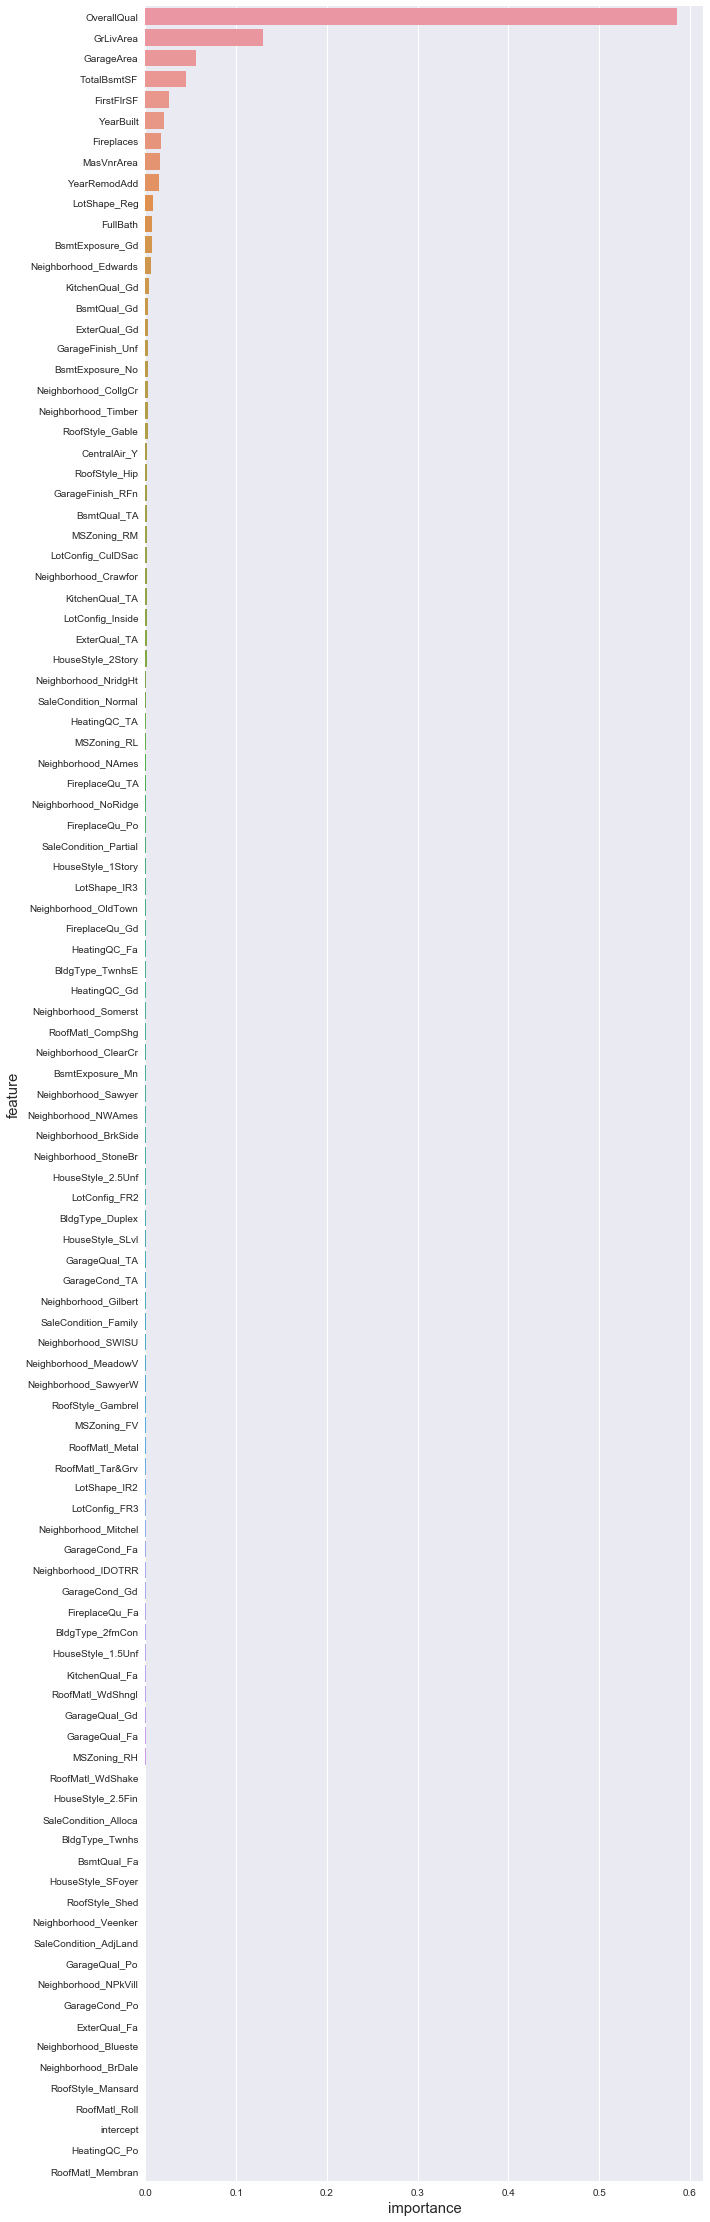

In [176]:
indices = np.argsort(radm_rgr.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(Final1x.shape[1]):
    feature_rank.loc[f] = [f+1,
                         Final1x.columns[indices[f]],
                         radm_rgr.feature_importances_[indices[f]]]
    
    
    import matplotlib.font_manager as fm

fontsize2use = 10

fig = plt.figure(figsize=(10,40))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)
ax = fig.add_subplot(111)
ax.set_xlabel('importance')
ax.set_ylabel('feature')

sns.barplot( y = 'feature', x = 'importance', data = feature_rank)
plt.show()

# ......................................Boosting.............................................

# AdaBoost

In [177]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [178]:
[10**x for x in range(-3, 3)]

[0.001, 0.01, 0.1, 1, 10, 100]

In [185]:
ada.get_params()

{'cv': 5,
 'error_score': 'raise',
 'estimator': AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
          n_estimators=50, random_state=None),
 'estimator__base_estimator': None,
 'estimator__learning_rate': 1.0,
 'estimator__loss': 'linear',
 'estimator__n_estimators': 50,
 'estimator__random_state': None,
 'fit_params': {},
 'iid': True,
 'n_jobs': -1,
 'param_grid': {'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
  'n_estimators': [100, 200, 400, 600, 800]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'scoring': None,
 'verbose': True}

In [180]:
paragrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10**x for x in range(-3, 3)]}

In [181]:
from sklearn.grid_search import GridSearchCV
ada = GridSearchCV(estimator=AdaBoostRegressor(),
                  param_grid=paragrid_ada,
                  cv=5,
                  verbose=True, n_jobs=-1)

In [182]:
ada.fit(Final1x,Final1y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [183]:
ada.best_params_

{'learning_rate': 1, 'n_estimators': 800}

In [184]:
ada_rgr = AdaBoostRegressor(learning_rate=1, n_estimators=200)

In [186]:
ada_rgr.fit(Final1x, Final1y)

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='linear',
         n_estimators=200, random_state=None)

In [187]:
ada_test_pred = pd.DataFrame({'actual': Final2y,
                            'predicted': ada_rgr.predict(Final2x)})

In [188]:
metrics.r2_score(ada_test_pred.actual, ada_test_pred.predicted)

0.77885918939146237

In [189]:
ada_rmse =  np.sqrt(metrics.mean_squared_error(ada_test_pred.actual, ada_test_pred.predicted))
print(ada_rmse)

37870.4736242


# Gradient Boosting

In [190]:
param_test1 = {'n_estimators': [100, 200, 400, 600, 800],
              'max_depth': list(range(1,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,
                                                               max_features='sqrt',subsample=0.8, random_state=10), 
                        param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)

In [191]:
gbm = GradientBoostingRegressor(learning_rate=0.1,min_samples_split=500,min_samples_leaf=50,max_depth=7, n_estimators =400,max_features='sqrt',subsample=0.8, random_state=10)

In [192]:
gbm.fit(Final1x,Final1y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False)

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(
          Final2x,
          Final2y,
          test_size=0.20,
           random_state=123)

In [194]:
gbm_test_pred= pd.DataFrame({'actual': Y_test,
                            'Predicted':gbm.predict(X_test)})

In [195]:
metrics.r2_score(gbm_test_pred.actual,gbm_test_pred.Predicted)

0.82966762400256067

In [196]:
gbm_rmse =  np.sqrt(metrics.mean_squared_error(gbm_test_pred.actual,gbm_test_pred.Predicted))
print(gbm_rmse)

37741.5448002


# .................................PCA.................................

In [197]:
#It actually reduces the dimentions and hence reduce in complexcity.

In [198]:
from sklearn.decomposition import PCA

In [199]:
#For doing PCA the data to be passed should be scaled
from sklearn.preprocessing import StandardScaler 

In [200]:
pca = PCA(30)

In [201]:
print (pca)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [202]:
pca_1 = PCA(1)
print (pca_1)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [203]:
X = final.drop(['SalePrice'], axis =1)

In [204]:
y =final.SalePrice

In [205]:
x_fit = pca.fit_transform(X)
print (x_fit.shape)

(1460, 30)


In [206]:
get_ipython().magic(u'matplotlib inline')

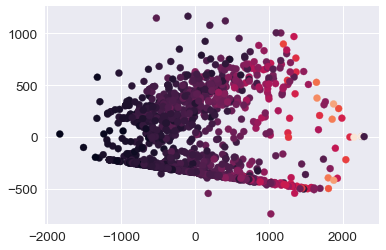

In [207]:
plt.scatter(x_fit[:,0], x_fit[:,1],c=y)
plt.show()

In [208]:
print (pca.components_)
print (pca.components_.shape)

[[  1.46235982e-03   1.75328151e-02   1.14444155e-02 ...,   1.89310257e-06
   -9.01101378e-05   1.12205363e-04]
 [  2.90356508e-04  -1.30439416e-02   7.41212298e-04 ...,  -9.44211886e-06
    7.90872024e-05  -6.83807867e-05]
 [ -2.12966554e-03  -6.71192599e-02  -2.54896751e-02 ...,   2.09276451e-05
    9.14412728e-05  -2.85779706e-04]
 ..., 
 [ -1.18087395e-02   4.88151134e-03   6.40872944e-04 ...,  -3.74072433e-04
   -1.29023556e-03  -1.02449707e-02]
 [  2.37942800e-02  -4.90803765e-04   5.81526191e-04 ...,  -6.85313306e-03
    8.29661669e-03   2.50977719e-02]
 [  2.88039975e-02   1.00216583e-03  -5.80601328e-04 ...,   1.03812650e-02
   -7.04117061e-02  -1.76018857e-02]]
(30, 105)


In [209]:
for component in pca.components_:
    print ('+'.join("%.2f x %s" % (value, name))
                        for value, name in zip(component, final))

<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 0x00000297C0703AF0>
<generator object <genexpr> at 

In [210]:
print (final)

      OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
0               7       2003          2003       196.0        856.0   
1               6       1976          1976         0.0       1262.0   
2               7       2001          2002       162.0        920.0   
3               7       1915          1970         0.0        756.0   
4               8       2000          2000       350.0       1145.0   
5               5       1993          1995         0.0        796.0   
6               8       2004          2005       186.0       1686.0   
7               7       1973          1973       240.0       1107.0   
8               7       1931          1950         0.0        952.0   
9               5       1939          1950         0.0        991.0   
10              5       1965          1965         0.0       1040.0   
11              9       2005          2006       286.0       1175.0   
12              5       1962          1962         0.0        912.0   
13    

In [211]:
print (pca.explained_variance_ratio_)

[  6.56555173e-01   2.15790847e-01   5.15345129e-02   4.20742363e-02
   3.24376125e-02   1.24794513e-03   3.49583944e-04   1.27004035e-06
   8.36794506e-07   6.77241411e-07   5.01587357e-07   4.71595359e-07
   4.19022744e-07   3.78521161e-07   3.77862709e-07   3.35956912e-07
   3.28510485e-07   2.88528947e-07   2.56134457e-07   2.38010605e-07
   2.21014953e-07   2.12854191e-07   1.86946562e-07   1.59989585e-07
   1.55070011e-07   1.46072456e-07   1.40470760e-07   1.31018872e-07
   1.16803766e-07   1.07727128e-07]


In [212]:
pca=PCA(0.92)
X_new = pca.fit_transform(X)
print (X_new.shape)

(1460, 3)


In [213]:
print (np.sum(pca.explained_variance_ratio_))

0.923880532726


In [214]:
pca = PCA(0.93)
X_new = pca.fit_transform(X)
print (X_new.shape)

(1460, 4)


In [215]:
pca.components_

array([[  1.46235982e-03,   1.75328151e-02,   1.14444155e-02,
          1.23818054e-01,   5.22775231e-01,   5.03172054e-01,
          6.44942843e-01,   5.04156654e-04,   4.85319421e-04,
          2.04450114e-01,   1.09877317e-28,  -5.02246391e-06,
         -6.54352079e-06,   1.72016359e-04,  -1.51383974e-04,
          2.04896180e-05,   7.94089596e-06,  -1.71849873e-04,
          3.94074866e-05,  -7.94247594e-06,   8.09081622e-07,
         -5.37030363e-05,  -1.93238988e-06,  -2.13090221e-05,
         -5.09285956e-05,   1.63191514e-05,   1.49839793e-05,
          1.74229049e-05,  -5.58066907e-05,  -1.71869555e-05,
         -3.79550997e-05,  -2.23464308e-05,  -8.69829485e-06,
         -5.49369882e-05,  -5.59476560e-06,   3.66033267e-05,
          7.24740059e-05,   1.08834414e-04,  -5.29576125e-05,
         -1.74771221e-06,  -3.50601213e-05,   6.33698750e-06,
          1.84946185e-05,   3.04671986e-05,   3.23446681e-05,
          5.56918209e-06,  -9.48862360e-06,   5.89853405e-06,
        

In [216]:
X_new

array([[ -94.98645741,  366.37217907, -190.86809516,  -75.23279853],
       [ -10.43012816, -339.96112366,   45.66059707,  -25.10580214],
       [  27.70164965,  362.51009384, -195.8679395 ,  -57.93301137],
       ..., 
       [ 547.28412897,  547.88926677,  286.82657125, -281.29115898],
       [-363.0829473 , -303.59960892,  142.37702328, -103.7665786 ],
       [ -58.39617549, -336.88606914,  185.38698093, -108.52731303]])

# Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [218]:
X_train , X_test, Y_train, Y_test = train_test_split(
        X_new,
        y,
        test_size=0.20,
        random_state=123)

In [219]:
y_pred = linear.predict(X_test)

In [220]:
from sklearn import metrics

In [221]:
metrics.r2_score(Y_test, y_pred)

0.73501041177136262

In [222]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

40466.450676088651